<left><img width=25% src="img/LR-Academy-Logo.png"></left>

# Lecture 2: Supervised Machine Learning

### Applied Machine Learning



# Recall: Supervised Learning

The most common approach to machine learning is supervised learning.

<center><img width=70% src="img/tesla_data.png"/></center>

1. First, we collect a dataset of labeled training examples.
2. We train a model to output accurate predictions on this dataset.
3. When the model sees new, similar data, it will also be accurate.

# Part 1: A First Supervised Machine Learning Problem

Let’s start with a simple example of a supervised learning problem: predicting diabetes risk.

Suppose we have a dataset of diabetes patients. 
* For each patient we have a access to measurements from their medical record and an estimate of diabetes risk.
* We are interested in understanding how the measurements affect an individual's diabetes risk.

# Three Components of A Supervised Machine Learning Problem

At a high level, a supervised machine learning problem has the following structure:

$$ \text{Dataset} + \text{Algorithm} \to \text{Predictive Model} $$

The predictive model is chosen to model the relationship between inputs and targets. For instance, it can predict future targets.

# A Supervised Learning Dataset

Let's return to our example: predicting diabates risk. What would a dataset look like?

We will use the UCI Diabetes Dataset; it's a toy dataset that's often used to demonstrate machine learning algorithms.
* For each patient we have a access to a measurement of their body mass index (BMI) and a quantiative diabetes risk score (from 0-400). 
* We are interested in understanding how BMI affects an individual's diabetes risk.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# diabetes_X
# # Use only the BMI feature
diabetes_X = diabetes_X.loc[:, ['bmi']]

# # The BMI is zero-centered and normalized; we recenter it for ease of presentation
diabetes_X = diabetes_X * 30 + 25

# # Collect 20 data points
diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]

# # Display some of the data points
pd.concat([diabetes_X_train, diabetes_y_train], axis=1).head()

We can also visualize this two-dimensional dataset.

Text(0, 0.5, 'Diabetes Risk')

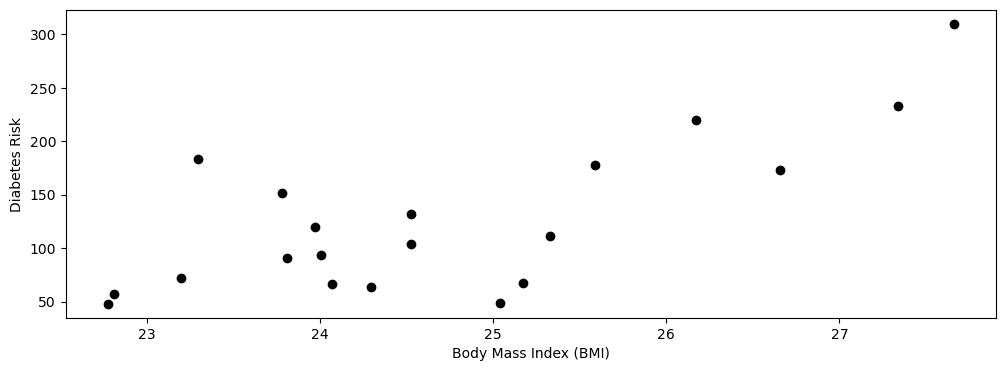

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

# A Supervised Learning Algorithm (Part 1)

What is the relationship between BMI and diabetes risk?

We could assume that risk is a linear function of BMI. In other words, for some unknown $\theta_0, \theta_1 \in \mathbb{R}$, we have
$$ y = \theta_1 \cdot x + \theta_0, $$
where $x$ is the BMI (also called the dependent variable), and $y$ is the diabetes risk score (the independent variable). 

Note that $\theta_1, \theta_0$ are the slope and the intercept of the line relates $x$ to $y$. We call them *parameters*.

We can visualize this for a few values of $\theta_1, \theta_0$.

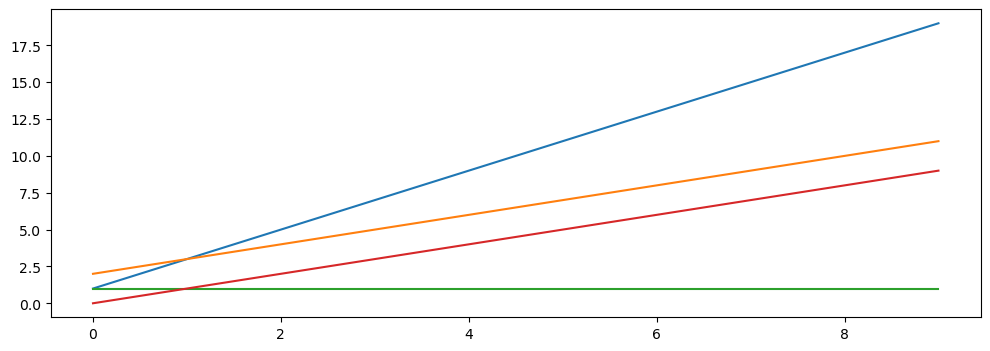

In [3]:
theta_list = [(1, 2), (2,1), (1,0), (0,1)]
for theta0, theta1 in theta_list:
    x = np.arange(10)
    y = theta1 * x + theta0
    plt.plot(x,y)

# A Supervised Learning Algorithm (Part 2)

Assuming that $x,y$ follow the above linear relationship, the goal of the __supervised learning algorithm__ is to find a good set of parameters consistent with the data.

We will see many algorithms for this task. For now, let's call the `sklearn.linear_model` library to find a $\theta_1, \theta_0$ that fit the data well.

In [4]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train.values)

# # Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# # The coefficients
print('Slope (theta1): \t', regr.coef_[0])
print('Intercept (theta0): \t', regr.intercept_)

Slope (theta1): 	 37.378842160517664
Intercept (theta0): 	 -797.0817390342369


In [5]:
diabetes_y_train_pred 

array([224.70261326,  92.9629219 , 149.76810992,  91.75430088,
        99.00602701, 143.72500481, 236.78882348, 100.21464803,
        73.62498556, 102.63189008, 199.32157181,  69.99912249,
       138.89052073, 111.09223723,  54.28704921, 159.4370781 ,
       119.55258438, 119.55258438, 181.19225649,  55.49567023])

In [6]:
diabetes_X_train.values.flatten()

array([27.33590163, 23.81145615, 25.33117117, 23.77912179, 23.97312796,
       25.16949936, 27.65924525, 24.00546232, 23.29410635, 24.07013104,
       26.65688002, 23.19710327, 25.04016191, 24.29647158, 22.77675656,
       25.58984607, 24.52281212, 24.52281212, 26.17186459, 22.80909092])

# A Supervised Learning Model

The supervised learning algorithm gave us a pair of parameters $\theta_1^*, \theta_0^*$. These define the *predictive model* $f^*$, defined as
$$ f(x) = \theta_1^* \cdot x + \theta_0^*, $$
where again $x$ is the BMI, and $y$ is the diabetes risk score.

We can visualize the linear model that fits our data.

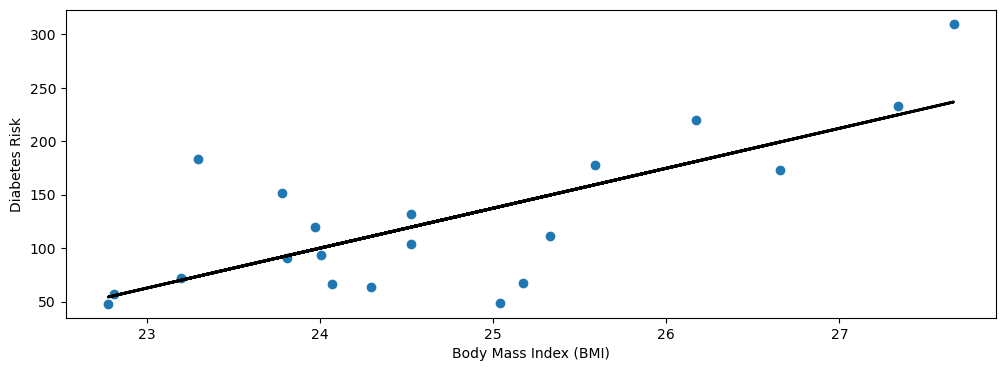

In [7]:
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.plot(diabetes_X_train.values.flatten(), diabetes_y_train_pred, color='black', linewidth=2);

# Predictions Using Supervised Learning

Given a new dataset of patients with a known BMI, we can use this model to estimate their diabetes risk.

Given a new $x'$, we can output a predicted $y'$ as
$$ y' = f(x') = \theta_1^* \cdot x' + \theta_0. $$

Let's start by loading more data. We will load three new patients (shown in red below) that we haven't seen before.

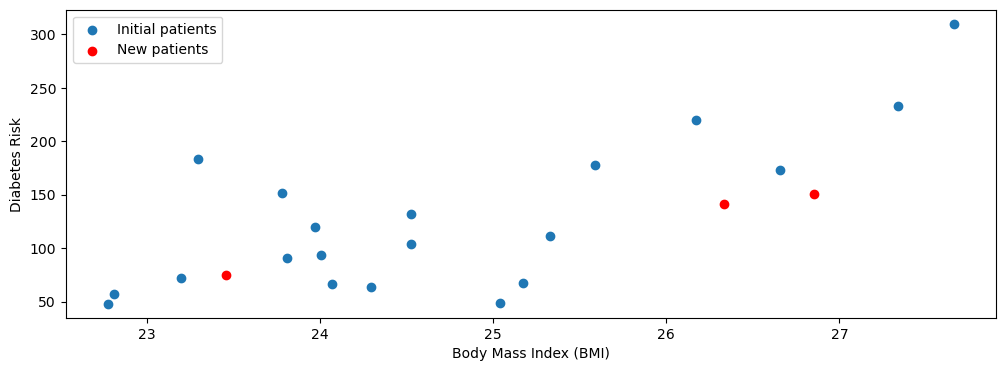

In [8]:
# Collect 3 data points
diabetes_X_test = diabetes_X.iloc[:3]
diabetes_y_test = diabetes_y.iloc[:3]

plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.legend(['Initial patients', 'New patients']);

Our linear model provides an estimate of the diabetes risk for these patients.

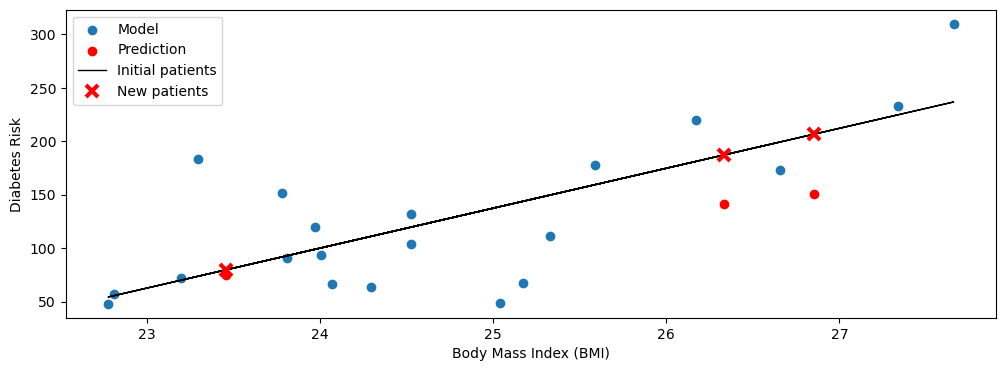

In [9]:
# generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test)

# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test, color='red', marker='o')
plt.plot(diabetes_X_train.values.flatten(), diabetes_y_train_pred, color='black', linewidth=1)
plt.plot(diabetes_X_test.values.flatten(), diabetes_y_test_pred, 'x', color='red', mew=3, markersize=8)
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients']);

# Why Supervised Learning?

Supervised learning can be useful in many ways.
* Making predictions on new data.
* Understanding the mechanisms through which input variables affect targets.

# Applications of Supervised Learning

Many of the most important applications of machine learning are supervised:
* Classifying medical images.
* Translating between pairs of languages.
* Detecting objects in a self-driving car.


# Part 2: Anatomy of a Supervised Learning Problem: Datasets

We have seen a simple example of a supervised machine learning problem and an algorithm for solving this problem.

Let's now look at what a general supervised learning problem looks like.

# Recall: Three Components of A Supervised Machine Learning Problem

At a high level, a supervised machine learning problem has the following structure:

$$ \text{Dataset} + \text{Algorithm} \to \text{Predictive Model} $$

The predictive model is chosen to model the relationship between inputs and targets. For instance, it can predict future targets.

# A Supervised Learning Dataset

We are going to dive deeper into what's a supervised learning dataset. As an example, consider the full version of the UCI Diabetes Dataset seen earlier.

Previsouly, we only looked at the patients' BMI, but this dataset actually records many additional measurements.

The UCI dataset contains many additional data columns besides `bmi`, including age, sex, and blood pressure. We can ask `sklearn` to give us more information about this dataset.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

# A Supervised Learning Dataset: Notation

We say that a training dataset of size $n$ (e.g., $n$ patients) is a set
$$\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$$

Each $x^{(i)}$ denotes an input (e.g., the measurements for patient $i$), and each $y^{(i)} \in \mathcal{Y}$ is a target (e.g., the diabetes risk). 

Together, $(x^{(i)}, y^{(i)})$ form a *training example*.

We can look at the diabetes dataset in this form.

In [12]:
# Load the diabetes dataset
diabetes_X, diabetes_y = diabetes.data, diabetes.target

# Print part of the dataset
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


# Training Dataset: Inputs

More precisely, an input $x^{(i)} \in \mathcal{X}$ is a $d$-dimensional vector of the form
$$ x^{(i)} = \begin{bmatrix}
x^{(i)}_1 \\
x^{(i)}_2 \\
\vdots \\
x^{(i)}_d
\end{bmatrix}$$
For example, it could be the measurements the values of the $d$ features for patient $i$.

The set $\mathcal{X}$ is called the feature space. Often, we have, $\mathcal{X} = \mathbb{R}^d$.

Let's look at data for one patient.

In [13]:
diabetes_X.iloc[0]

age    0.038076
sex    0.050680
bmi    0.061696
bp     0.021872
s1    -0.044223
s2    -0.034821
s3    -0.043401
s4    -0.002592
s5     0.019908
s6    -0.017646
Name: 0, dtype: float64

# Training Dataset: Attributes

We refer to the numerical variables describing the patient as *attributes*. Examples of attributes include:
* The age of a patient.
* The patient's gender.
* The patient's BMI.

Note that thes attributes in the above example have been mean-centered at zero and re-scaled to have a variance of one.

# Training Dataset: Features

Often, an input object has many attributes, and we want to use these attributes to define more complex descriptions of the input.

* Is the patient old and a man? (Useful if old men are at risk).
* Is the BMI above the obesity threshold?

We call these custom attributes *features*.

Let's create an "old man" feature.

In [14]:
diabetes_X['old_man'] = (diabetes_X['sex'] > 0) & (diabetes_X['age'] > 0.05)
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,old_man
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,False
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,False
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,True
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,False
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,False


# Training Dataset: Features

More formally, we can define a function $\phi : \mathcal{X} \to \mathbb{R}^p$ that takes an input $x^{(i)} \in \mathcal{X}$ and outputs a $p$-dimensional vector
$$ \phi(x^{(i)}) = \left[\begin{array}{@{}c@{}}
\phi(x^{(i)})_1 \\
\phi(x^{(i)})_2 \\
\vdots \\
\phi(x^{(i)})_p
\end{array} \right]$$
We say that $\phi(x^{(i)})$ is a *featurized* input, and each $\phi(x^{(i)})_j$ is a *feature*.

# Features vs Attributes

In practice, the terms attribute and features are often used interchangeably. Most authors refer to $x^{(i)}$ as a vector of features (i.e., they've been precomputed). 

We will follow this convention and use attribute only when there is ambiguity between features and attributes.

# Features: Discrete vs. Continuous 

Features can be either discrete or continuous. We will see later that they may be handled differently by ML algorthims.

The BMI feature that we have seen earlier is an example of a continuous feature.

We can visualize its distribution.

<AxesSubplot:>

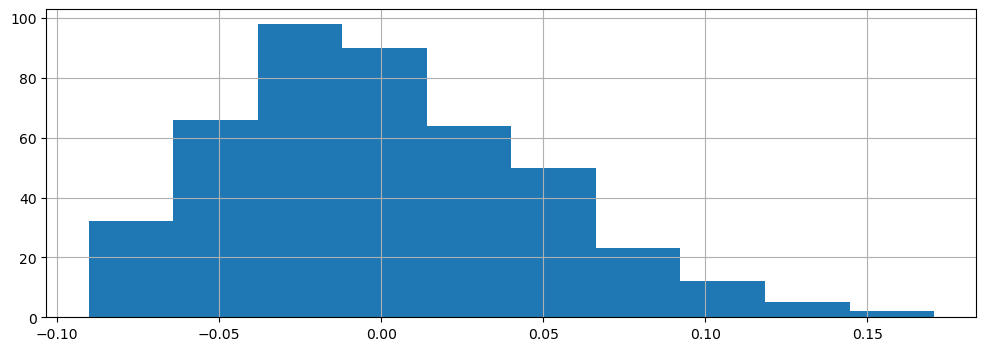

In [15]:
diabetes_X.loc[:, 'bmi'].hist()

Other features take on one of a finite number of discrete values. The `sex` column is an example of a categorical feature.

In this example, the dataset has been pre-processed such that the two values happen to be `0.05068012` and `-0.04464164`.

[ 0.05068012 -0.04464164]


<AxesSubplot:>

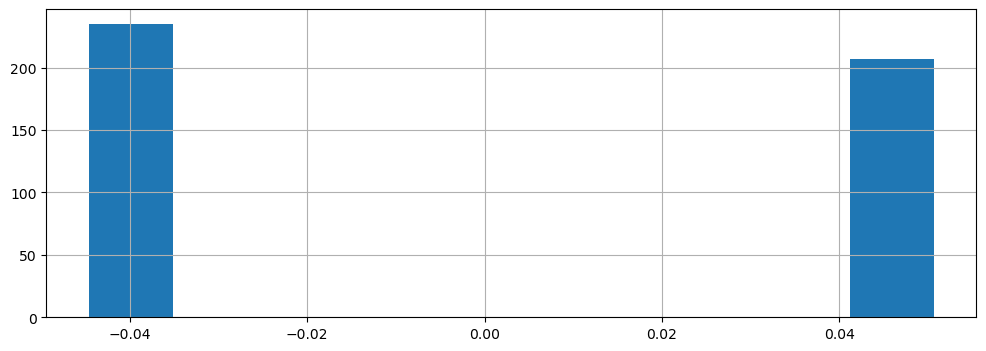

In [16]:
print(diabetes_X.loc[:, 'sex'].unique())
diabetes_X.loc[:, 'sex'].hist()

# Training Dataset: Targets

For each patient, we are interested in predicting a quantity of interest, the *target*. In our example, this is the patient's diabetes risk.

Formally, when $(x^{(i)}, y^{(i)})$ form a *training example*, each $y^{(i)} \in \mathcal{Y}$ is a target. We call $\mathcal{Y}$ the target space.

We plot the distirbution of risk scores below.

<AxesSubplot:xlabel='Diabetes risk score', ylabel='Number of patients'>

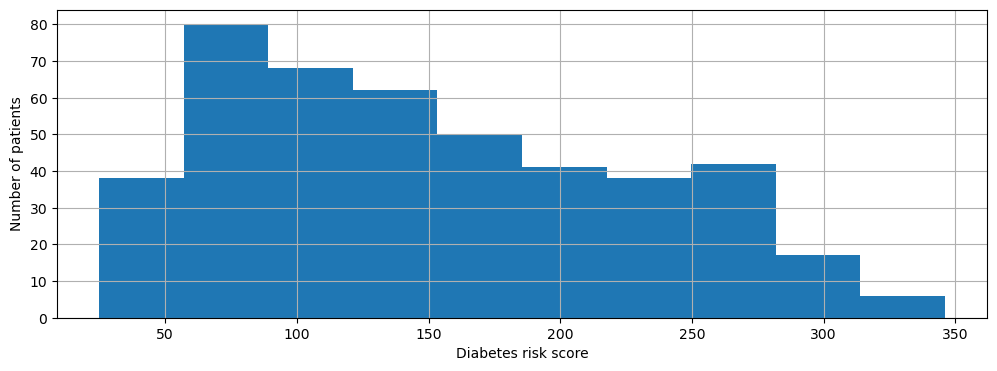

In [17]:
plt.xlabel('Diabetes risk score')
plt.ylabel('Number of patients')
diabetes_y.hist()

# Targets: Regression vs. Classification

We distinguish between two broad types of supervised learning problems that differ in the form of the target variable.

1. __Regression__: The target variable $y$ is continuous. We are fitting a curve in a high-dimensional feature space that approximates the shape of the dataset.
2. __Classification__: The target variable $y$ is discrete. Each discrete value corresponds to a *class* and we are looking for a hyperplane that separates the different classes.

We can easily turn our earlier regression example into classification by discretizing the diabetes risk scores into high or low.

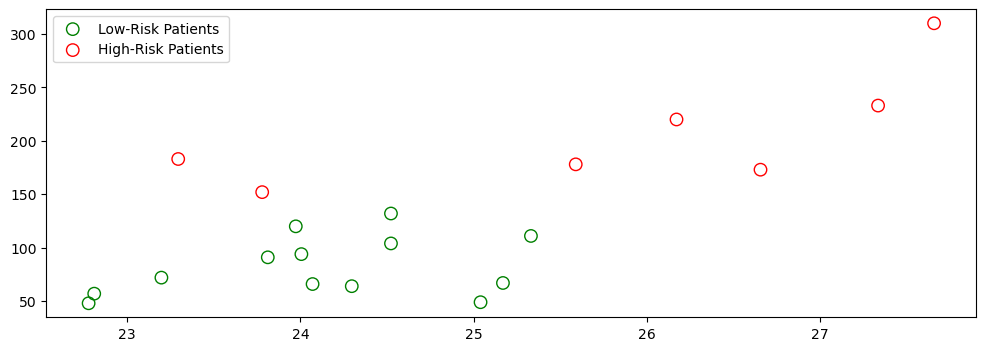

In [18]:
# Discretize the targets
diabetes_y_train_discr = np.digitize(diabetes_y_train, bins=[150])

# Visualize it
plt.scatter(diabetes_X_train[diabetes_y_train_discr==0], diabetes_y_train[diabetes_y_train_discr==0], marker='o', s=80, facecolors='none', edgecolors='g')
plt.scatter(diabetes_X_train[diabetes_y_train_discr==1], diabetes_y_train[diabetes_y_train_discr==1], marker='o', s=80, facecolors='none', edgecolors='r')
plt.legend(['Low-Risk Patients', 'High-Risk Patients'])

In [19]:
diabetes_y_train_discr = np.digitize(diabetes_y_train, bins=[150])
diabetes_y_train_discr

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

Let's try to generate predictions for this dataset.

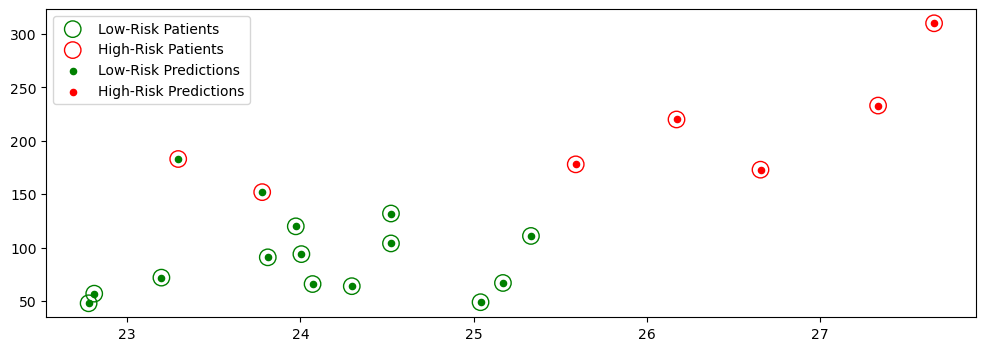

In [20]:
# Create logistic regression object (note: this is actually a classification algorithm!)
clf = linear_model.LogisticRegression()

# Train the model using the training sets
clf.fit(diabetes_X_train, diabetes_y_train_discr)

# Make predictions on the training set
diabetes_y_train_pred = clf.predict(diabetes_X_train )

# Visualize it
plt.scatter(diabetes_X_train[diabetes_y_train_discr==0], diabetes_y_train[diabetes_y_train_discr==0], marker='o', s=140, facecolors='none', edgecolors='g')
plt.scatter(diabetes_X_train[diabetes_y_train_discr==1], diabetes_y_train[diabetes_y_train_discr==1], marker='o', s=140, facecolors='none', edgecolors='r')
plt.scatter(diabetes_X_train[diabetes_y_train_pred==0], diabetes_y_train[diabetes_y_train_pred==0], color='g', s=20)
plt.scatter(diabetes_X_train[diabetes_y_train_pred==1], diabetes_y_train[diabetes_y_train_pred==1], color='r', s=20)
plt.legend(['Low-Risk Patients', 'High-Risk Patients', 'Low-Risk Predictions', 'High-Risk Predictions'])


# Part 3: Anatomy of a Supervised Learning Problem: Learning Algorithm

Let's now look at what a general supervised learning algorithm looks like.

# Recall: Three Components of A Supervised Machine Learning Problem

At a high level, a supervised machine learning problem has the following structure:

$$ \text{Dataset} + \text{Algorithm} \to \text{Predictive Model} $$

The predictive model is chosen to model the relationship between inputs and targets. For instance, it can predict future targets.

# The Components of A Supervised Machine Learning Algorithm

We can also define the high-level structure of a supervised learning algorithm as consisting of three components:
* A __model class__: the set of possible models we consider.
* An __objective__ function, which defines how good a model is.
* An __optimizer__, which finds the best predictive model in the model class according to the objective function

Let's look again at our diabetes dataset for an example.

In [21]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)
diabetes_X, diabetes_y = diabetes.data, diabetes.target

# Print part of the dataset
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


# Model: Notation

We'll say that a model is a function
$$ f : \mathcal{X} \to \mathcal{Y} $$
that maps inputs $x \in \mathcal{X}$ to targets $y \in \mathcal{Y}$.

Often, models have *parameters* $\theta \in \Theta$ living in a set $\Theta$. We will then write the model as
$$ f_\theta : \mathcal{X} \to \mathcal{Y} $$
to denote that it's parametrized by $\theta$.

# Model Class: Notation

Formally, the model class is a set 
$$\mathcal{M} \subseteq \{f \mid f : \mathcal{X} \to \mathcal{Y} \}$$
of possible models that map input features to targets.

When the models $f_\theta$ are paremetrized by *parameters* $\theta \in \Theta$ living in some set $\Theta$. Thus we can also write
$$\mathcal{M} = \{f_\theta \mid f : \mathcal{X} \to \mathcal{Y}; \; \theta \in \Theta \}.$$

# Model Class: Example

One simple approach is to assume that $x$ and $y$ are related by a linear model of the form
\begin{align*}
y & = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_d \cdot x_d
\end{align*}
where $x$ is a featurized output and $y$ is the target.

The $\theta_j$ are the *parameters* of the model.
<!-- By using the notation $x_0 = 1$, we can represent the model in a vectorized form
$$ y = \sum_{j=0}^d \beta_j \cdot x_j = \vec \beta \cdot \vec x. $$
where $\vec x$ is a vector of features. -->

# Objectives: Notation

<!-- Given a training set, how do we pick the parameters $\theta$ for the model? A natural approach is to select $\theta$ such that $f_\theta(x^{(i)})$ is close to $y^{(i)}$ on a training dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$. -->

To capture this intuition, we define an *objective function* (also called a *loss function*)
$$J(f) : \mathcal{M} \to [0, \infty), $$
which describes the extent to which $f$ "fits" the data $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$.

When $f$ is parametrized by $\theta \in \Theta$, the objective becomes a function $J(\theta) : \Theta \to [0, \infty).$

# Objective: Examples

What would are some possible objective functions? We will see many, but here are a few examples:
* Mean squared error: $$J(\theta) = \frac{1}{2n} \sum_{i=1}^n \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2$$
* Absolute (L1) error: $$J(\theta) = \frac{1}{n} \sum_{i=1}^n \left| f_\theta(x^{(i)}) - y^{(i)} \right|$$

These are defined for a dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$.

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y1 = np.array([1, 2, 3, 4])
y2 = np.array([-1, 1, 3, 5])

print('Mean squared error: %.2f' % mean_squared_error(y1, y2))
print('Mean absolute error: %.2f' % mean_absolute_error(y1, y2))

Mean squared error: 1.50
Mean absolute error: 1.00


# Optimizer: Notation

At a high-level an optimizer takes an objective $J$ and a model class $\mathcal{M}$ and finds a model $f \in \mathcal{M}$ with the smallest value of the objective $J$.

\begin{align*}
\min_{f \in \mathcal{M}} J(f)
\end{align*}

Intuitively, this is the function that bests "fits" the data on the training dataset.

When $f$ is parametrized by $\theta \in \Theta$, the optimizer minimizes a function $J(\theta)$ over all $\theta \in \Theta$.

# Optimizer: Example

We will see that behind the scenes, the `sklearn.linear_models.LinearRegression` algorithm optimizes the MSE loss.

\begin{align*}
\min_{\theta \in \mathbb{R}} \frac{1}{2n} \sum_{i=1}^n \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2
\end{align*}

We can easily measure the quality of the fit on the training set and the test set.

Let's run the above algorithm on our diabetes dataset.

In [23]:
# Collect 20 data points for training
diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train.values)

# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# Collect 3 data points for testing
diabetes_X_test = diabetes_X.iloc[:3]
diabetes_y_test = diabetes_y.iloc[:3]

# generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test)

The algorithm returns a predictive model. We can visualize its predictions below.

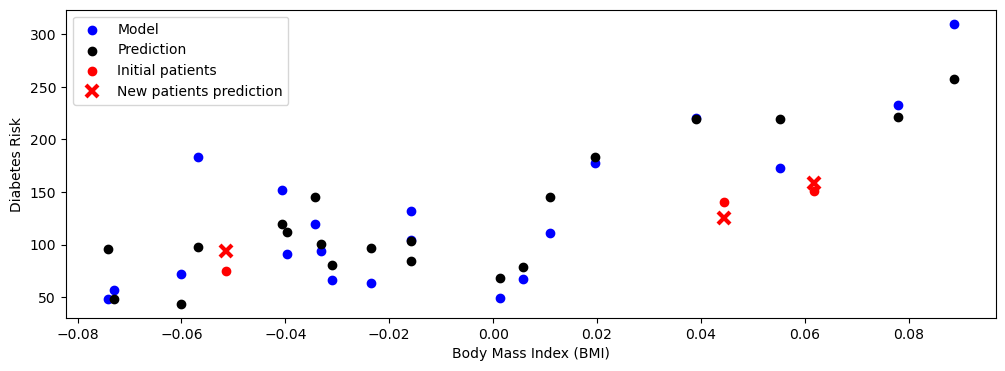

In [24]:
# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train.loc[:, ['bmi']].values.flatten(), diabetes_y_train, color='blue', label='train_data')
plt.scatter(diabetes_X_train.loc[:, ['bmi']].values.flatten(), diabetes_y_train_pred, color='black', linewidth=1, label='predict_train')

plt.scatter(diabetes_X_test.loc[:, ['bmi']].values.flatten(), diabetes_y_test, color='red', marker='o', label='test_data')
plt.plot(diabetes_X_test.loc[:, ['bmi']].values.flatten(), diabetes_y_test_pred, 'x', color='red', mew=3, markersize=8, label='predict_test')
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients prediction'])
# plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error

print('Training set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_train, diabetes_y_train_pred))
print('Test set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_test_pred))
print('Test set mean squared error on random inputs: %.2f'
      % mean_squared_error(diabetes_y_test, np.random.randn(*diabetes_y_test_pred.shape)))

Training set mean squared error: 1144.28
Test set mean squared error: 228.50
Test set mean squared error on random inputs: 16175.48


# Summary: Components of A Supervised Machine Learning Problem

At a high level, a supervised machine learning problem has the following structure:

$$ \text{Dataset} + \underbrace{\text{Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

The predictive model is chosen to model the relationship between inputs and targets. For instance, it can predict future targets.

# Notation: Feature Matrix

Suppose that we have a dataset of size $n$ (e.g., $n$ patients), indexed by $i=1,2,...,n$. Each $x^{(i)}$ is a vector of $d$ features.

#### Feature Matrix
Machine learning algorithms are most easily defined in the language of linear algebra. Therefore, it will be useful to represent the entire dataset as one matrix $X \in \mathbb{R}^{n \times d}$, of the form:
$$ X = \begin{bmatrix}
x^{(1)}_1 & x^{(2)}_1 & \ldots & x^{(n)}_1 \\
x^{(1)}_2 & x^{(2)}_2 & \ldots & x^{(n)}_2 \\
\vdots \\
x^{(1)}_d & x^{(2)}_d & \ldots & x^{(n)}_d
\end{bmatrix}.$$

Similarly, we can vectorize the target variables into a vector $y \in \mathbb{R}^n$ of the form
$$ y = \begin{bmatrix}
x^{(1)} \\
x^{(2)} \\
\vdots \\
x^{(n)}
\end{bmatrix}.$$